### FEATURE ENGINEERING

In [2]:
import pandas as pd
df = pd.read_csv('/content/final csv for Regional sales.csv')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.head(1)

,Unnamed: 0,order_number,orderdate,name,channel,product name,order quantity,unit price,revenue,total unit cost,total unit cost.1,state_code,county,state,latitude,longitude,2017 budgets
0,0,SO - 000225,2014-01-01,Savannah,Wholesale,Product 27,6,2499.1,14994.6,1824.343,1824.343,GA,Chatham County,Georgia,32.08354,-81.09983,NaN


In [7]:
# Clean column names (optional but helpful if names have spaces or typos)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Calculate revenue if not present
df['revenue'] = df['order_quantity'] * df['unit_price']

# Calculate total cost
df['total_unit_cost'] = df['order_quantity'] * df['total_unit_cost']

# Calculate profit
df['profit'] = df['revenue'] - df['total_unit_cost']

# Optional: View profit
print(df[['order_number', 'product_name', 'revenue', 'total_unit_cost', 'profit']].head())

   order_number product_name  revenue  total_unit_cost     profit
0   SO - 000225   Product 27  14994.6        10946.058   4048.542
1  SO - 0003378   Product 20  25868.7        13969.098  11899.602
2  SO - 0005126   Product 26   5869.2         4108.440   1760.760
3  SO - 0005614    Product 7  16368.1         7201.964   9166.136
4  SO - 0005781    Product 8  18331.2        10082.160   8249.040


In [8]:
df.head()

,unnamed:_0,order_number,orderdate,name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,total_unit_cost.1,state_code,county,state,latitude,longitude,2017_budgets,profit
0,0,SO - 000225,2014-01-01,Savannah,Wholesale,Product 27,6,2499.1,14994.6,10946.058,1824.343,GA,Chatham County,Georgia,32.08354,-81.09983,NaN,4048.542
1,1,SO - 0003378,2014-01-01,Greenwood,Distributor,Product 20,11,2351.7,25868.7,13969.098,1269.918,IN,Johnson County,Indiana,39.61366,-86.10665,NaN,11899.602
2,2,SO - 0005126,2014-01-01,Pleasanton,Wholesale,Product 26,6,978.2,5869.2,4108.440,684.740,CA,Alameda County,California,37.66243,-121.87468,NaN,1760.760
3,3,SO - 0005614,2014-01-01,Bloomington,Export,Product 7,7,2338.3,16368.1,7201.964,1028.852,IN,Monroe County,Indiana,39.16533,-86.52639,NaN,9166.136
4,4,SO - 0005781,2014-01-01,Manchester,Wholesale,Product 8,8,2291.4,18331.2,10082.160,1260.270,CT,Hartford County,Connecticut,41.77524,-72.52443,NaN,8249.040


# EXPLORTORY DATA ANALYSIS :

In [9]:
 df.head(1)

,unnamed:_0,order_number,orderdate,name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,total_unit_cost.1,state_code,county,state,latitude,longitude,2017_budgets,profit
0,0,SO - 000225,2014-01-01,Savannah,Wholesale,Product 27,6,2499.1,14994.6,10946.058,1824.343,GA,Chatham County,Georgia,32.08354,-81.09983,NaN,4048.542


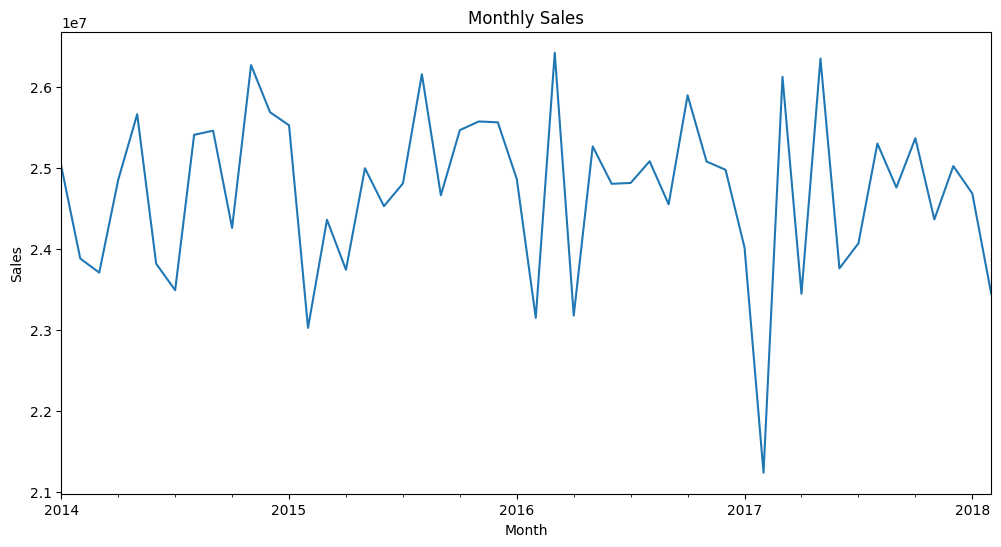

In [12]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
df['order_month'] = df['orderdate'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum()
plt.figure(figsize=(12,6))
monthly_sales.plot()
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()
# YEARLY SALES TREND DIVINDING YEARS IN QUARTER WRT MONTHS:

In [ ]:
# we understand by this graph that sales continuosly spikes up-down between 2.5-2.6 and below 2.5 we are able to see outliers too.

Converts 'orderdate' to Datetime: It converts the orderdate column to datetime objects using pd.to_datetime(). This is necessary for extracting date-related information.


Extracts Month and Year: It creates a new column order_month by extracting the year and month from the orderdate column using .dt.to_period('M').


Calculates Monthly Sales: It groups the DataFrame by the order_month and calculates the sum of the revenue for each month, storing the result in monthly_sales.


Creates a Plot: It sets up a figure for plotting with a specified size.
Plots Monthly Sales: It generates a line plot of the monthly_sales data, showing the trend of revenue over time.


Sets Plot Title and Labels: It adds a title ('Monthly Sales') and labels for the x-axis ('Month') and y-axis ('Sales') to the plot.
Displays the Plot: Finally, it displays the generated plot.

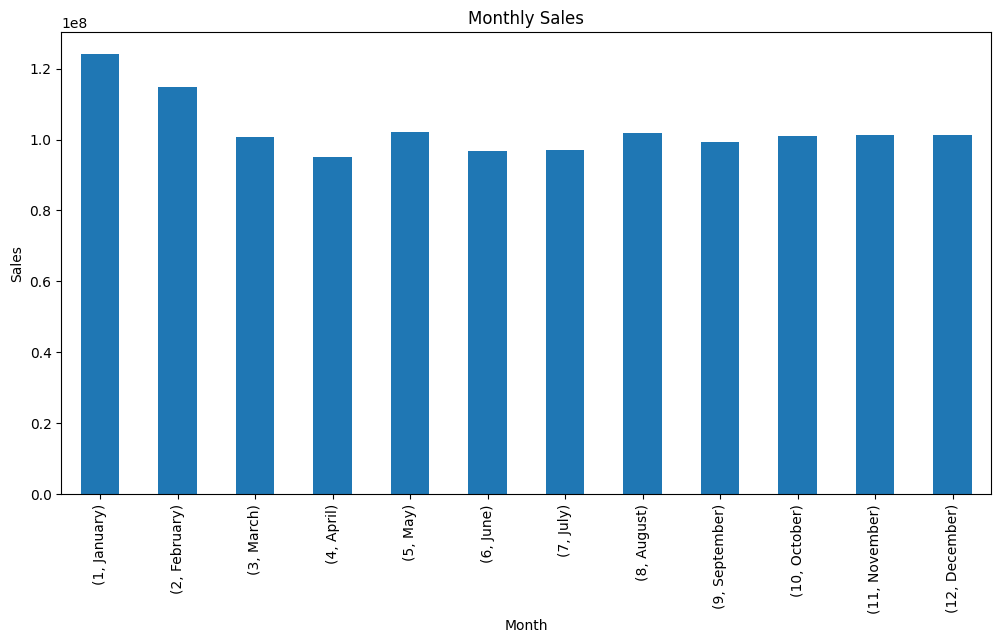

In [15]:
df['order_month_name'] = df['orderdate'].dt.month_name()
df['order_month_num'] = df['orderdate'].dt.month
monthly_sales = df.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().sort_index()
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

/tmp/ipython-input-18-3410553370.py:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


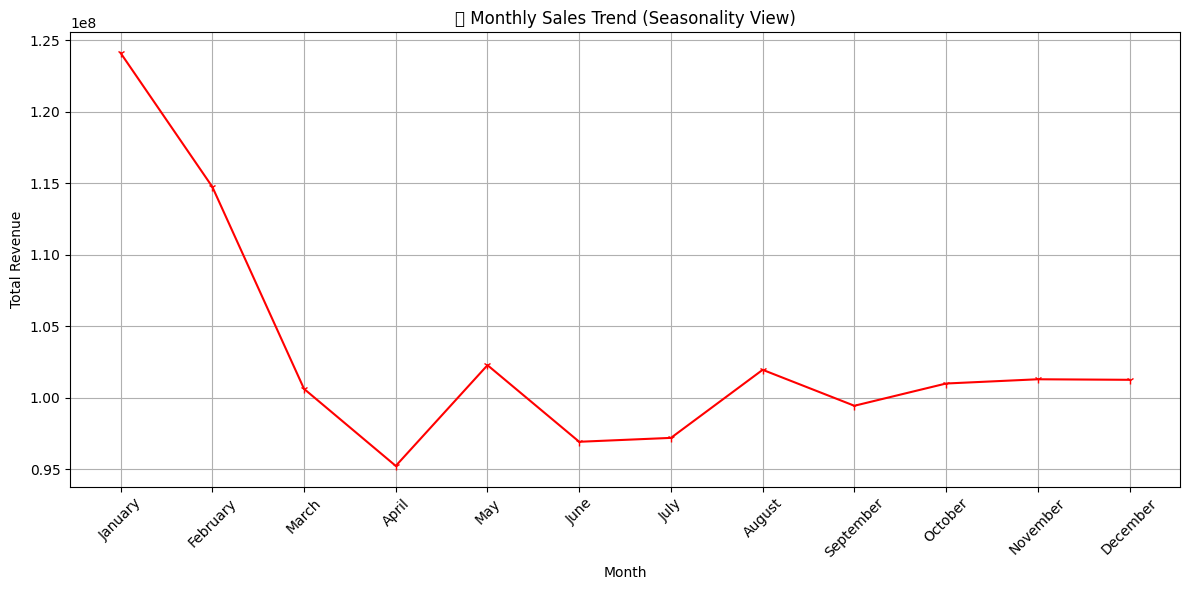

In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'orderdate' to datetime
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['orderdate'])

# Extract month number and name
df['month'] = df['orderdate'].dt.month
df['month_name'] = df['orderdate'].dt.month_name()

# Group by month and sum revenue
monthly_sales = df.groupby(['month', 'month_name'])['revenue'].sum().reset_index()

# Sort by actual calendar month
monthly_sales = monthly_sales.sort_values('month')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_name'], monthly_sales['revenue'], marker='1', linestyle='-', color='red')
plt.title('📈 Monthly Sales Trend (Seasonality View)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


INSIGHTS ::

🌟 Peak Sales in January

January shows the highest sales, significantly above all other months.

This suggests strong post-holiday demand, year-end budget utilization, or seasonal promotions driving purchases.

📉 Steady Decline from February to April

February is also strong but slightly lower than January.

Sales dip consistently from March to April, with April having the lowest point in the year.

This may indicate a post-festive cooldown, or perhaps a lull before mid-year procurement cycles.

📈 Small Recovery in May

There's a slight uptick in May, possibly due to financial year planning, stock replenishment, or seasonal needs.

🔁 Stable but Moderate Sales (June to December)

From June onward, sales hover around a similar range, with minor fluctuations.

August and November see slight increases, hinting at pre-festival or pre-winter stock-ups.

However, these are nowhere near the January peak.

🟢 Flat Year-End

October to December remains consistent, with no major spike.

If December had a high sales expectation due to holidays, the data shows it may be underperforming or less critical compared to January.

📌 Business Recommendations:
Plan major marketing or product pushes in December to capture January's demand.

Investigate April's low performance—is it due to budget cycles, holidays, or other operational issues?

Maintain inventory preparedness for early Q1 (Jan–Feb).

Capitalize on minor peaks (e.g., May, August, November) with targeted promotions or seasonal bundles



In [19]:

# Convert 'orderdate' to datetime if not already
df['orderdate'] = pd.to_datetime(df['orderdate'], errors='coerce')

# Filter out January and February 2018
df = df[~((df['orderdate'].dt.year == 2018) & (df['orderdate'].dt.month.isin([1, 2])))]

# Optional: Reset index after filtering
df = df.reset_index(drop=True)

/tmp/ipython-input-20-1485651932.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


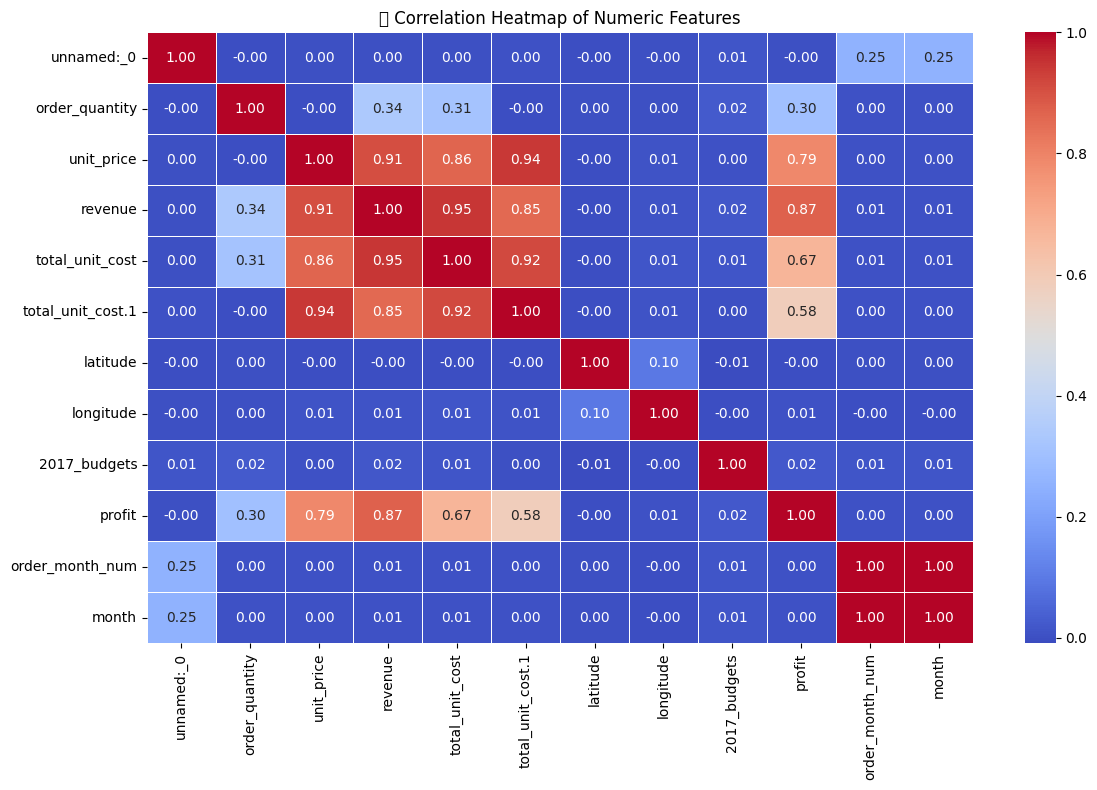

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('🔍 Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


In [21]:
# To find top 10 revenue products :
# Group by product name and sum the revenue
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10)

# Display top 10 products
print(top_products)


product_name
Product 26    112454990.9
Product 25    105715762.4
Product 13     75190019.7
Product 14     72516666.1
Product 5      68032711.2
Product 15     64933726.7
Product 2      54976803.1
Product 4      54558669.5
Product 1      53678832.2
Product 3      49935227.3
Name: revenue, dtype: float64


/tmp/ipython-input-24-3417145511.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='revenue', y='product_name', palette='viridis')
/tmp/ipython-input-24-3417145511.py:23: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


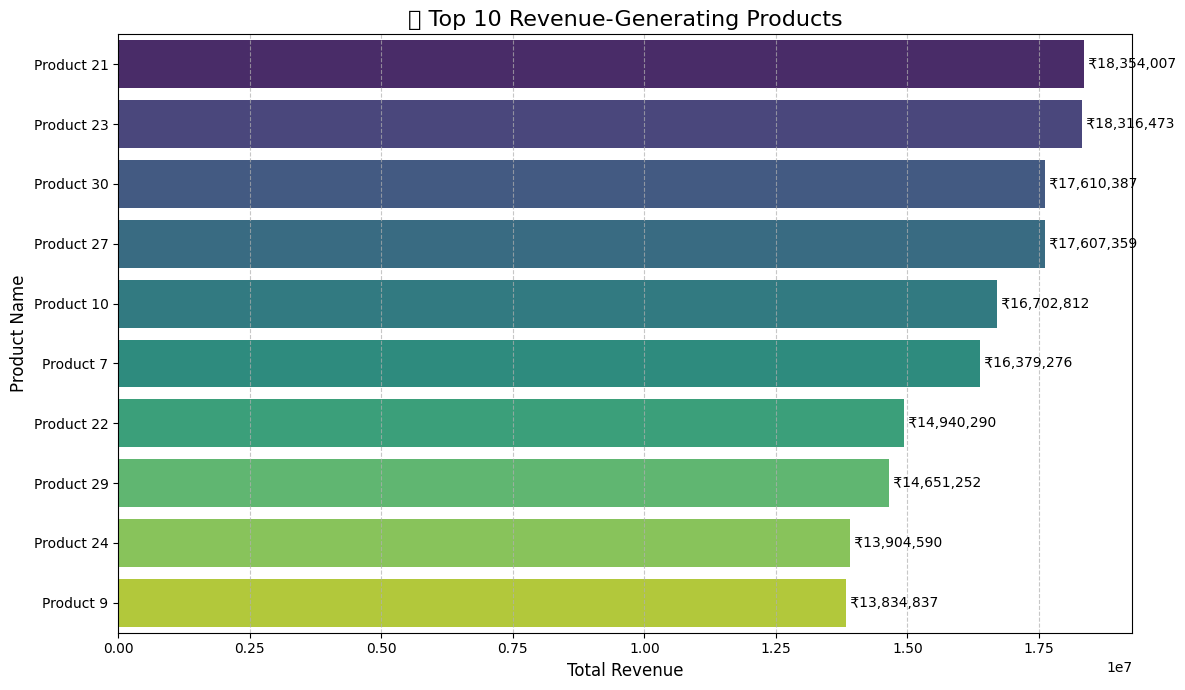

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 products by revenue
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=True).head(10).reset_index()

# Sort values for better bar order
top_products = top_products.sort_values(by='revenue', ascending=False)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(data=top_products, x='revenue', y='product_name', palette='viridis')

# Add value labels
for index, value in enumerate(top_products['revenue']):
    plt.text(value, index, f' ₹{value:,.0f}', va='center')

# Formatting
plt.title('💰 Top 10 Revenue-Generating Products', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-25-2486558813.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-25-2486558813.py:32: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


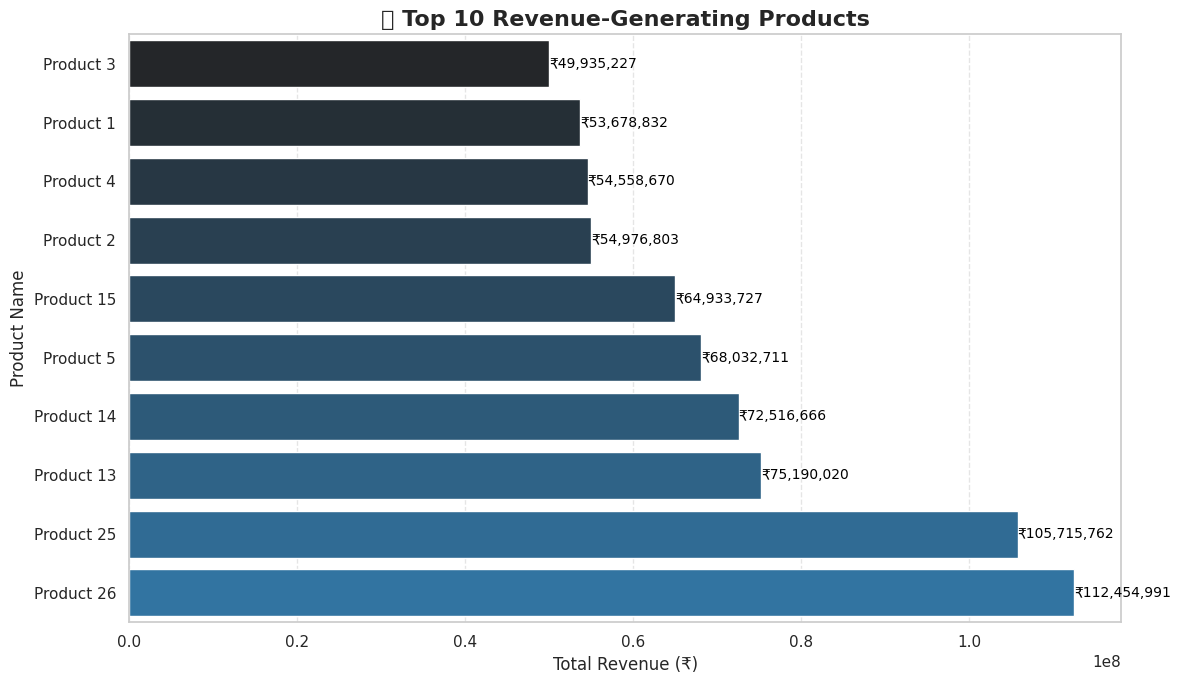

In [25]:
# LETS USE MORE DARKER PALETTE
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 products by revenue
top_products = df.groupby('product_name')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Sort for better visual order
top_products = top_products.sort_values(by='revenue', ascending=True)

# Set style
sns.set(style="whitegrid")

# Plot with dark tone
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_products,
    x='revenue',
    y='product_name',
    palette='dark:#1f77b4',  # darker blue tone
)

# Add value labels
for index, value in enumerate(top_products['revenue']):
    plt.text(value + 5000, index, f'₹{value:,.0f}', va='center', color='black', fontsize=10)

# Styling
plt.title('💼 Top 10 Revenue-Generating Products', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue (₹)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-26-2755876423.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chan_sales, x='channel', y='revenue', palette='viridis')


<Axes: xlabel='channel', ylabel='revenue'>

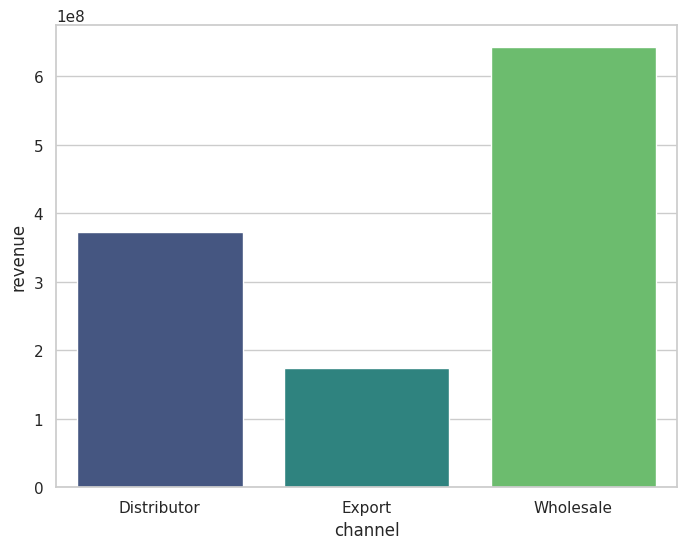

In [26]:
# SALES BY CHANNEL :
chan_sales = df.groupby('channel')['revenue'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=chan_sales, x='channel', y='revenue', palette='viridis')

/tmp/ipython-input-28-3501844772.py:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


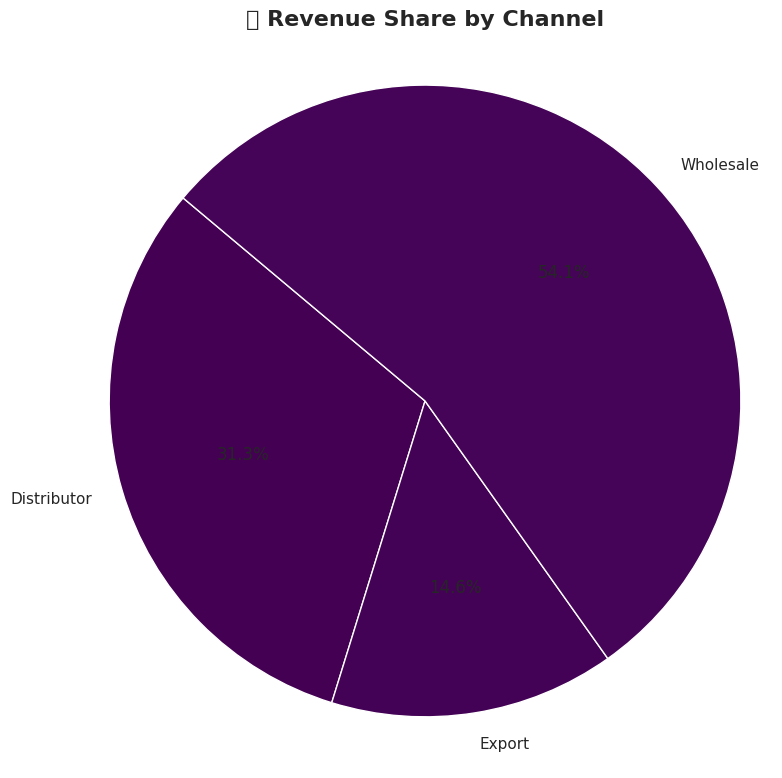

In [28]:
import matplotlib.pyplot as plt

# Group data by channel
chan_sales = df.groupby('channel')['revenue'].sum().reset_index()

# Prepare labels and sizes
labels = chan_sales['channel']
sizes = chan_sales['revenue']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis.colors[:len(labels)]
)

# Title and layout
plt.title("📊 Revenue Share by Channel", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is round
plt.tight_layout()
plt.show()


<Axes: xlabel='revenue', ylabel='Count'>

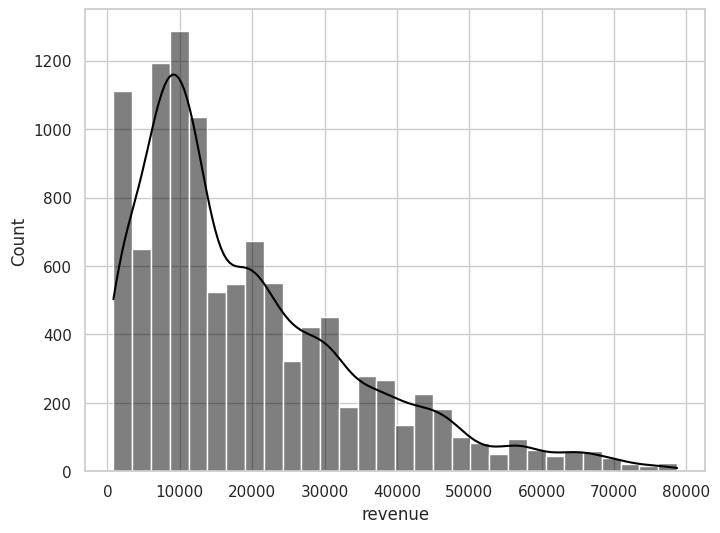

In [30]:
#AVERAGE ORDER VALUE (AOV) DISTRIBUTION  :
aov = df.groupby('order_number')['revenue'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.histplot(data=aov, x='revenue', kde=True, bins=30, color='black')


This is heavily right sckrewed

🔍 Key Insights from the Revenue Distribution:
🔺 Skewed Distribution (Right-skewed):

Most orders have low revenue (₹5,000–₹15,000 range).

The distribution tapers off towards higher revenues.

This is typical in many retail settings: a few high-value orders, but lots of smaller ones.

📌 High Density at Low Revenue:

The peak is around ₹10,000, meaning most orders are in this zone.

These are your most frequent transactions, probably for popular, low-to-mid priced items.

📉 Long Tail of High Revenue:

Orders beyond ₹40,000 are rare, but they do exist (possibly bulk B2B or premium products).

These may require targeted strategies (e.g., loyalty, upselling).

🎯 Strategy Opportunity:

Since most orders cluster below ₹20,000, you can:

Create bundle offers in that price range.

Analyze what products dominate these buckets.

Incentivize customers near ₹15,000–₹20,000 to increase cart size.

🛑 Outliers Possible:

Few orders reach ₹60,000–₹75,000 — consider analyzing these separately for:

Fraud checks

VIP customer segmentation

Special services

💡 Recommendations:
Do a log-transformation of revenue if using this in regression/ML to normalize it.

Consider a segmentation analysis: low, mid, high revenue order bands.

If available, match high revenue orders with channel, product, or region for more targeted business action.

Would you like me to help you break the revenue into bins like:

Low (< ₹10,000)

Medium (₹10,000–₹30,000)

High (> ₹30,000)

In [31]:
df['revenue'].skew()


np.float64(1.2266013267137317)

🔍 Interpretation:
✅ Skewness = 1.23 → Positive Skew (Right-Skewed)
This means:

Most of your revenue values are concentrated on the lower end (₹5,000–₹15,000).

A few large revenue values (₹50,000+) are pulling the mean to the right, creating a long tail.

🧠 What This Implies:
Mean > Median
Your average revenue will be higher than what most customers actually pay.

Impacts on Analysis:

Use median instead of mean to describe central tendency.

Consider log transformation if you're doing regression or clustering:

python
Copy
Edit
df['log_revenue'] = np.log1p(df['revenue'])
Business Insight:

A few high-value orders contribute disproportionately to revenue.

Most orders are small/medium size – your bread and butter.

In [32]:
# UNIT PRICE DISTRUBUTION PER PRODUCT
# TOP 10 STATES BY REVENE AND ORDER COUNT
# AVERAGE PROFIT MARGING BY CHANNEL
# TOP AND BOTTOM 10 CUSTOMERS BY REVENE
# CUSTOMER SEGMENTATION: Revenue VS Profit Margin
# Coorelation HeatMap

In [33]:
df.head()

,unnamed:_0,order_number,orderdate,name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,...,state,latitude,longitude,2017_budgets,profit,order_month,order_month_name,order_month_num,month,month_name
0,0,SO - 000225,2014-01-01,Savannah,Wholesale,Product 27,6,2499.1,14994.6,10946.058,...,Georgia,32.08354,-81.09983,NaN,4048.542,2014-01,January,1,1,January
1,1,SO - 0003378,2014-01-01,Greenwood,Distributor,Product 20,11,2351.7,25868.7,13969.098,...,Indiana,39.61366,-86.10665,NaN,11899.602,2014-01,January,1,1,January
2,2,SO - 0005126,2014-01-01,Pleasanton,Wholesale,Product 26,6,978.2,5869.2,4108.440,...,California,37.66243,-121.87468,NaN,1760.760,2014-01,January,1,1,January
3,3,SO - 0005614,2014-01-01,Bloomington,Export,Product 7,7,2338.3,16368.1,7201.964,...,Indiana,39.16533,-86.52639,NaN,9166.136,2014-01,January,1,1,January
4,4,SO - 0005781,2014-01-01,Manchester,Wholesale,Product 8,8,2291.4,18331.2,10082.160,...,Connecticut,41.77524,-72.52443,NaN,8249.040,2014-01,January,1,1,January


###1️⃣ Unit Price Distribution per Product

/tmp/ipython-input-34-3042570031.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='product_name', y='unit_price', palette='magma')
/tmp/ipython-input-34-3042570031.py:13: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


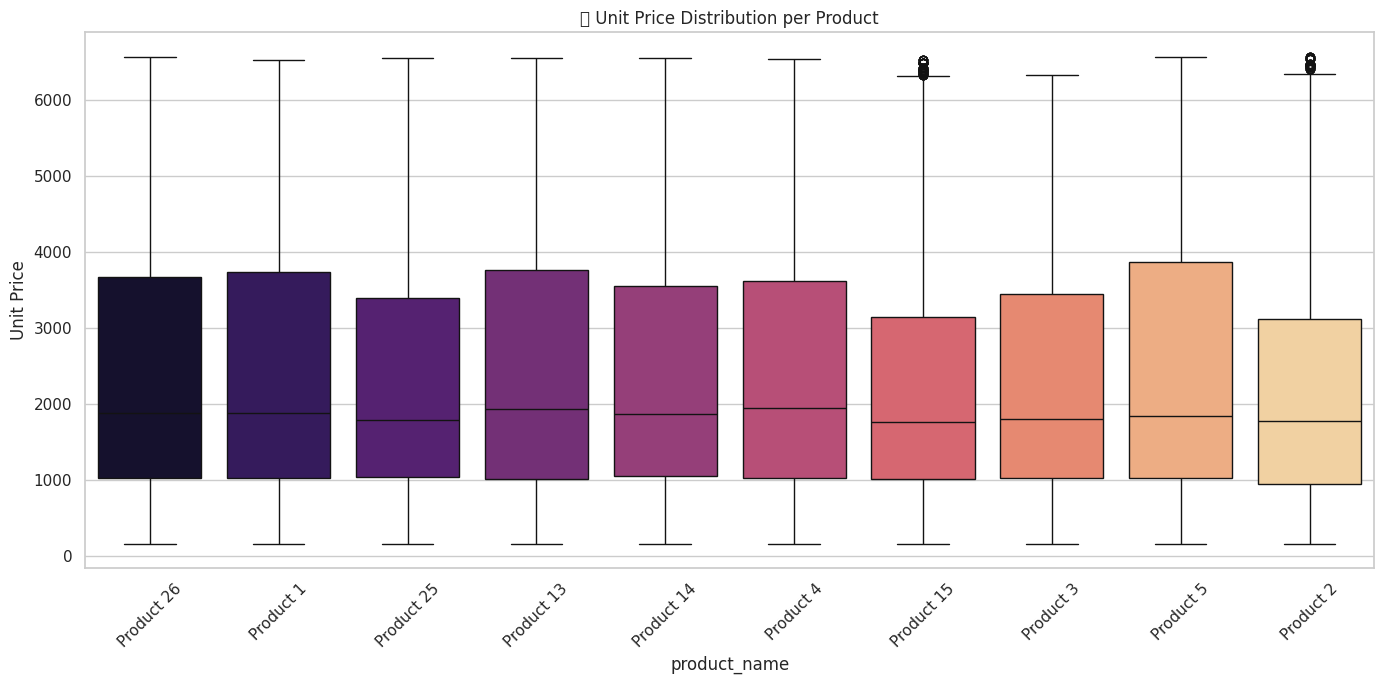

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limit to top 10 products by count for clarity
top_products = df['product_name'].value_counts().head(10).index
subset = df[df['product_name'].isin(top_products)]

plt.figure(figsize=(14, 7))
sns.boxplot(data=subset, x='product_name', y='unit_price', palette='magma')
plt.title('🎯 Unit Price Distribution per Product')
plt.xticks(rotation=45)
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()


### 2️⃣ Top 10 States by Revenue and Order Count

/tmp/ipython-input-35-1926859831.py:19: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


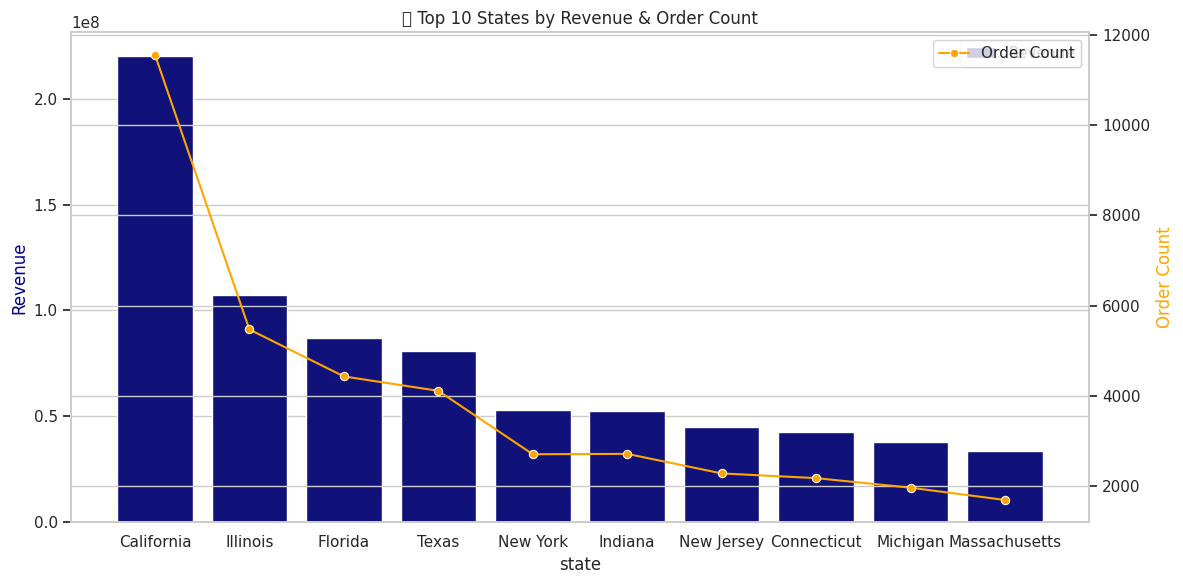

In [35]:
# Group by state
state_stats = df.groupby('state').agg({'revenue': 'sum', 'order_number': 'count'}).rename(columns={'order_number': 'order_count'}).reset_index()

# Top 10 by revenue
top_states = state_stats.sort_values(by='revenue', ascending=False).head(10)

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data=top_states, x='state', y='revenue', color='darkblue', label='Revenue', ax=ax1)
ax1.set_ylabel('Revenue', color='darkblue')

# Add order count on secondary axis
ax2 = ax1.twinx()
sns.lineplot(data=top_states, x='state', y='order_count', marker='o', color='orange', label='Order Count', ax=ax2)
ax2.set_ylabel('Order Count', color='orange')

plt.title('📍 Top 10 States by Revenue & Order Count')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


### 3️⃣ Average Profit Margin by Channel

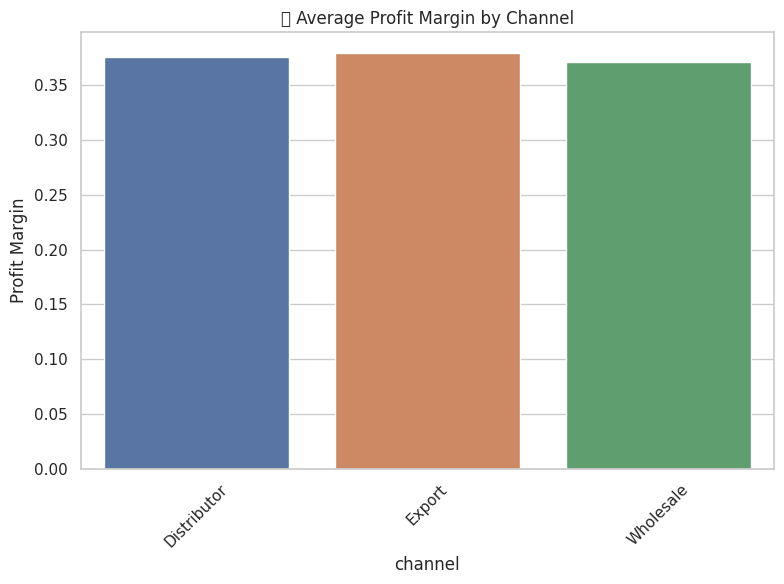

In [36]:
# Calculate profit margin = profit / revenue
df['profit_margin'] = df['profit'] / df['revenue']

# Group by channel
channel_margin = df.groupby('channel')['profit_margin'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=channel_margin, x='channel', y='profit_margin', palette='deep')
plt.title('📦 Average Profit Margin by Channel')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###4️⃣ Top and Bottom 10 Customers by Revenue

/tmp/ipython-input-37-3477771850.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='revenue', y='name', palette='Greens', ax=axs[0])
/tmp/ipython-input-37-3477771850.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, x='revenue', y='name', palette='Reds', ax=axs[1])
/tmp/ipython-input-37-3477771850.py:23: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-37-3477771850.py:23: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MO

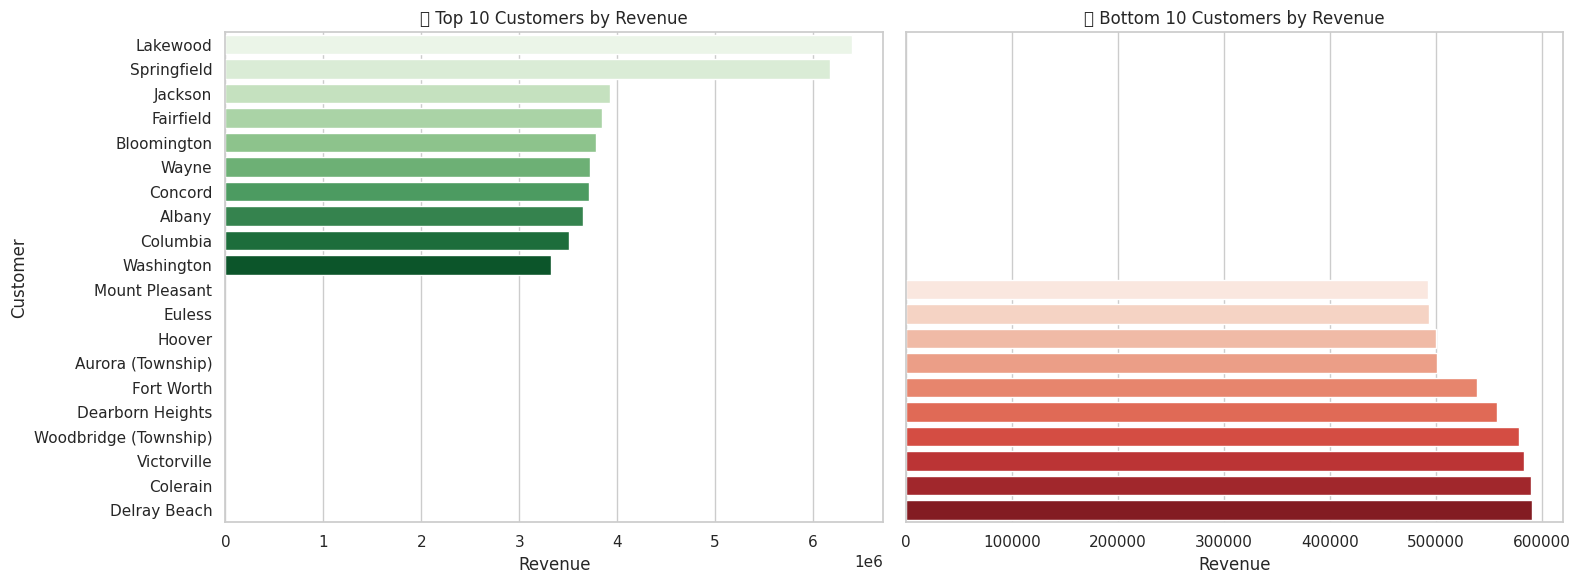

In [37]:
# Group by customer
cust_revenue = df.groupby('name')['revenue'].sum().reset_index()

# Top 10
top_10 = cust_revenue.sort_values(by='revenue', ascending=False).head(10)

# Bottom 10 (excluding zero-revenue if needed)
bottom_10 = cust_revenue[cust_revenue['revenue'] > 0].sort_values(by='revenue').head(10)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(16,6), sharey=True)

sns.barplot(data=top_10, x='revenue', y='name', palette='Greens', ax=axs[0])
axs[0].set_title('💰 Top 10 Customers by Revenue')
axs[0].set_xlabel('Revenue')
axs[0].set_ylabel('Customer')

sns.barplot(data=bottom_10, x='revenue', y='name', palette='Reds', ax=axs[1])
axs[1].set_title('🔻 Bottom 10 Customers by Revenue')
axs[1].set_xlabel('Revenue')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


###
5️⃣ Customer Segmentation: Revenue vs Profit Margin

/tmp/ipython-input-38-3347274745.py:17: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


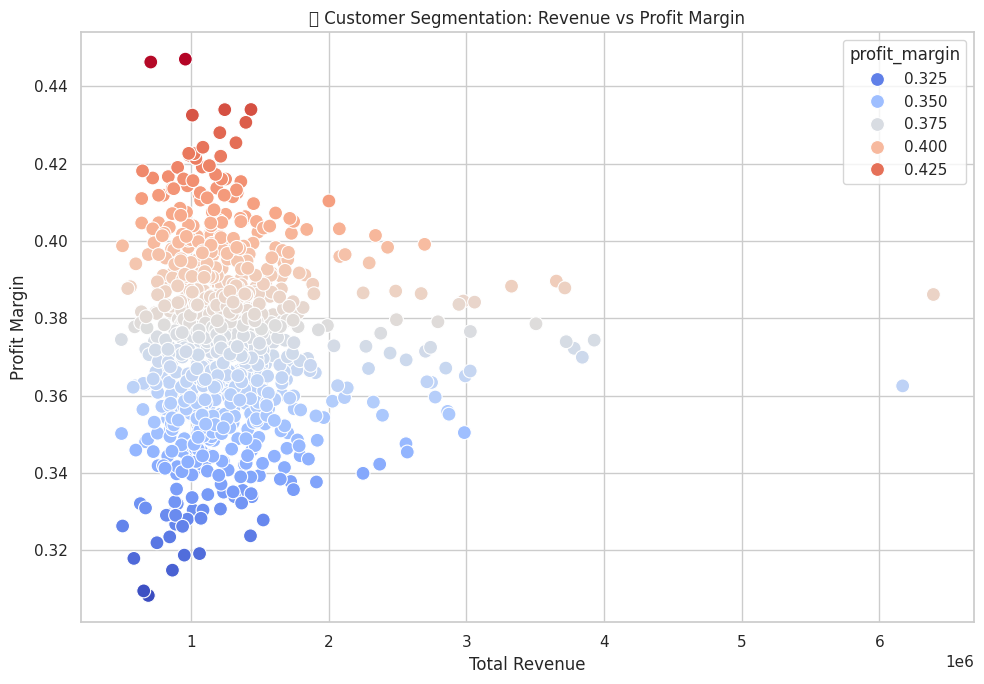

In [38]:
# Group by customer
customer_seg = df.groupby('name').agg({
    'revenue': 'sum',
    'profit': 'sum'
}).reset_index()

# Calculate profit margin
customer_seg['profit_margin'] = customer_seg['profit'] / customer_seg['revenue']

# Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=customer_seg, x='revenue', y='profit_margin', hue='profit_margin', palette='coolwarm', s=100)
plt.title('📌 Customer Segmentation: Revenue vs Profit Margin')
plt.xlabel('Total Revenue')
plt.ylabel('Profit Margin')
plt.grid(True)
plt.tight_layout()
plt.show()


1. Monthly Sales Trend (Line Plot and Bar Plot):

There's a clear seasonality in sales, with a significant peak in January.
Sales generally decline from February to April, with April being the lowest month.
There's a slight recovery in May, and sales remain relatively stable but moderate from June to December.
There isn't a major spike in sales towards the end of the year (October to December), which might be unexpected if holiday sales were a significant factor.
2. Revenue Share by Channel (Pie Chart):

The Wholesale channel contributes the largest share of revenue.
Distributor is the second largest contributor.
Export has the smallest share of revenue.
3. Top 10 Revenue-Generating Products (Bar Plot):

Products 26, 25, 13, and 14 are the top revenue generators, significantly outperforming other products.
There's a clear drop-off in revenue after the top few products.
4. Average Order Value (AOV) Distribution (Histogram):

The distribution is heavily right-skewed, meaning most orders have a relatively low revenue.
The peak of the distribution is around ₹10,000, indicating that a large number of orders are in this range.
There's a long tail extending to higher revenue values, indicating a few high-value orders.
5. Unit Price Distribution per Product (Box Plot):

This plot shows the range and distribution of unit prices for the top 10 most frequent products.
Some products have a wide range of unit prices (e.g., Product 26, Product 1), while others have a more concentrated range (e.g., Product 3, Product 8).
Outliers in unit price are visible for several products.
6. Top 10 States by Revenue & Order Count (Bar and Line Plot):

California is the top state by a significant margin in terms of both revenue and order count.
Other states like Illinois, Florida, and Texas also contribute significantly to revenue and order count.
In some states, there's a close relationship between revenue and order count, while in others, one might be proportionally higher than the other.
7. Average Profit Margin by Channel (Bar Plot):

The average profit margin is relatively similar across all channels, with Export having a slightly higher average margin than Distributor and Wholesale.
8. Top and Bottom 10 Customers by Revenue (Bar Plots):

These plots highlight the customers who contribute the most and the least to revenue.
Identifying top customers can help in understanding who your most valuable clients are, while analyzing bottom customers might reveal opportunities for improvement or different strategies.